In dit programma :
- inlezen
- horizontaal knippen 
- vertikaal knippen
- horizontaal en vertikaal knippen 

In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#functie om beeld om te zetten naar matrix 
def imagetomatrix (file) :
    image = Image.open(file)
    imagematrix = np.asarray(image)
    return imagematrix   


(148, 148, 3)


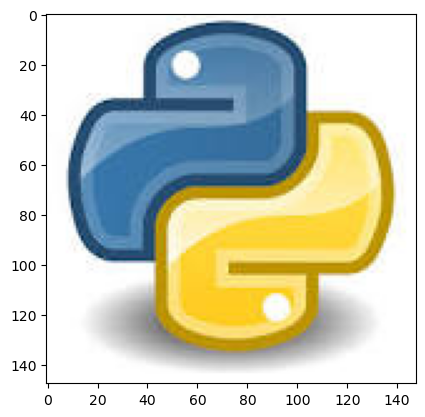

In [3]:
im_pylogo = imagetomatrix(os.path.join(os.path.dirname(os.getcwd()),'data\input\python.jpg')) 
print(im_pylogo.shape)
plt.imshow(im_pylogo)


In [4]:
#functie om (image)matrix horizontaal te knippen
def cuthor (image, nb_pieces, line_thickness, line_color) :
    hbar = np.zeros(shape = (line_thickness, image.shape[1], 3), dtype=np.int32) 
    for i in range(line_thickness) :
        for j in range(image.shape[1]) :
            hbar[i,j] = line_color
    #plt.imshow(hbar)     

    to_cut = image.copy()
    image_cuthor = hbar.copy()
    for i in range(1, nb_pieces) :
        cut, to_cut = np.split(to_cut, [round(image.shape[0] / nb_pieces)], axis = 0) #horizontaal knippen 
        image_cuthor = np.concatenate([image_cuthor, cut, hbar], axis = 0)
        #print(i, cut.shape, to_cut.shape, image_cuthor.shape)
    x, image_cuthor = np.split(np.concatenate([image_cuthor, to_cut], axis = 0), [line_thickness], axis = 0)
    return image_cuthor


(288, 148, 3)


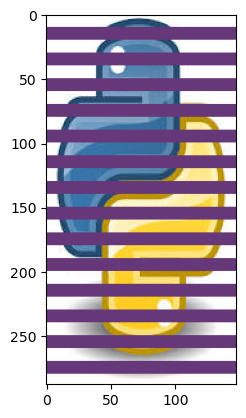

In [5]:
im_pylogo_cuthor = cuthor(im_pylogo, 15, 10, [103,56,121])
plt.imshow(im_pylogo_cuthor)
print(im_pylogo_cuthor.shape)

In [6]:
#functie om (image)matrix vertikaal te knippen
def cutver (image, nb_pieces, line_thickness, line_color) :
    vbar = np.zeros(shape = (image.shape[0], line_thickness, 3), dtype=np.int32) 
    for i in range(image.shape[0]) :
        for j in range(line_thickness) :
            vbar[i,j] = line_color
    #plt.imshow(vbar)     

    to_cut = image.copy()
    image_cutver = vbar.copy()
    for i in range(1, nb_pieces) :
        cut, to_cut = np.split(to_cut, [round(image.shape[1] / nb_pieces)], axis = 1) #vertikaal knippen 
        image_cutver = np.concatenate([image_cutver, cut, vbar], axis = 1)
        #print(i, cut.shape, to_cut.shape, image_cutver.shape)
    x, image_cutver = np.split(np.concatenate([image_cutver, to_cut], axis = 1), [line_thickness], axis = 1)
    return image_cutver


(148, 178, 3)


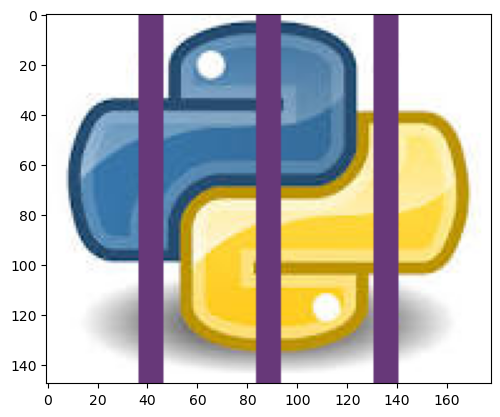

In [7]:
im_pylogo_cutver = cutver(im_pylogo, 4, 10, [103,56,121])
plt.imshow(im_pylogo_cutver)
print(im_pylogo_cutver.shape)

In [8]:
#functie om (image)matrix horizontaal & vertikaal te knippen
def cuthorver (image, nb_horpieces, nb_verpieces, line_thickness, line_color) :
    hbar = np.zeros(shape = (line_thickness, image.shape[1] + (nb_verpieces-1)*line_thickness, 3), dtype=np.int32) 
    for i in range(line_thickness) :
        for j in range(image.shape[1] + (nb_verpieces-1)*line_thickness) :
            hbar[i,j] = line_color
    #print("hbar", hbar.shape)
    #plt.imshow(hbar)     

    to_cut = image.copy()
    image_cuthorver = hbar.copy()
    
    for i in range(1, nb_horpieces) :
        cut, to_cut = np.split(to_cut, [round(image.shape[0] / nb_horpieces)], axis = 0) #horizontaal knippen
        #print("a", i, cut.shape, to_cut.shape, image_cuthorver.shape)
        cut = cutver(cut, nb_verpieces, line_thickness, line_color) #hstrook i vertikaal knippen
        #print("b", i, cut.shape, to_cut.shape, image_cuthorver.shape)
        image_cuthorver = np.concatenate([image_cuthorver, cut, hbar], axis = 0)
        #print("c", i, cut.shape, to_cut.shape, image_cuthorver.shape)
    
    to_cut = cutver(to_cut, nb_verpieces, line_thickness, line_color) #laatste hstrook vertikaal knippen
    #print("d", i, cut.shape, to_cut.shape, image_cuthorver.shape)
    
    x, image_cuthorver = np.split(np.concatenate([image_cuthorver, to_cut], axis = 0), [line_thickness], axis = 0)
    #print("e", i, cut.shape, to_cut.shape, image_cuthorver.shape)
    
    return image_cuthorver   

(166, 166, 3)


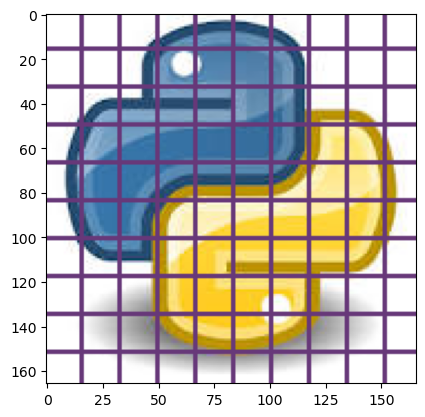

In [9]:
im_pylogo_cuthorver = cuthorver(im_pylogo, 10, 10, 2, [103,56,121])
plt.imshow(im_pylogo_cuthorver)
print(im_pylogo_cuthorver.shape)